### ***Prediction Of Total Booking On CAB Data***

---



In [0]:
import pandas as pd
import numpy as np
import warnings 
warnings.simplefilter("ignore")

In [0]:
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
import os
os.getcwd()

'C:\\Users\\Satyam\\PycharmProjects\\Coding_Solutions\\Mid-Project-1\\New Project'

#### Load Train Data

In [0]:
train_data=pd.read_csv(r'train.csv')
train_label=pd.read_csv(r'train_label.csv',header=None)

#### Load Test Data

In [0]:
test_data=pd.read_csv(r'test.csv')
test_label=pd.read_csv(r'test_label.csv',header=None)

In [0]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [0]:
train_label.head()

,0
0,504
1,5
2,139
3,209
4,184


In [0]:
train_data["label"]=train_label.values
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,label
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [0]:
train_data.shape

(8708, 10)

### Checking For Data_Types

In [0]:
train_data.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
label           int64
dtype: object

### Missing Values Analysis

In [0]:
train_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
label         False
dtype: bool

In [0]:
test_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

#### There is No Null Values in any Column

### Making Date Column into datetime format

In [0]:
train_data["datetime"]=pd.to_datetime(train_data["datetime"])

### Season

In [0]:
train_data["season"].unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [0]:
test_data["season"].unique()

array(['Summer', 'Spring', 'Winter', 'Fall'], dtype=object)

### Weather

In [0]:
train_data["weather"].unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [0]:
test_data["weather"].unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy '], dtype=object)

#### There Is No Weather Of type  ' Heavy Rain + Thunderstorm ' in Test Data

### Removing Weather Not In Test Data

In [0]:
train_data=train_data[train_data.weather!=' Heavy Rain + Thunderstorm ']

### Data_Visualisation On Train_Data

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train_data.columns,test_data.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'label'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'))

### Data Distribution

In [0]:
date_series=train_data[["datetime","label"]]
date_series=date_series.set_index("datetime")
resample=date_series.resample("M")["label"].sum()

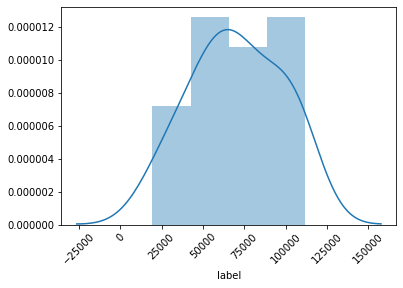

In [0]:
sns.distplot(resample)
plt.tick_params(axis="x",rotation=45)

Text(0.5, 0, 'Year')

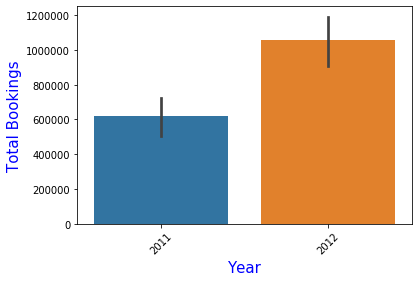

In [0]:
sns.barplot(resample.index.year,resample,estimator=np.sum)
plt.tick_params(axis="x",rotation=45)
plt.ylabel("Total Bookings",color="blue",fontsize=15)
plt.xlabel("Year",color="blue",fontsize=15)

#### Total Booking  is increased from year 2011 to 2012

In [0]:
resample=date_series.resample("y")["label"].sum()
print(resample)
a=resample[0]
b=resample[1]
percent=(b-a)/a
print("Percentage increase in Bookings is:",round(percent*100,2))

datetime
2011-12-31     621243
2012-12-31    1059298
Freq: A-DEC, Name: label, dtype: int64
Percentage increase in Bookings is: 70.51


#### Season_wise Total Booking

Text(0.5, 0, 'Seasons')

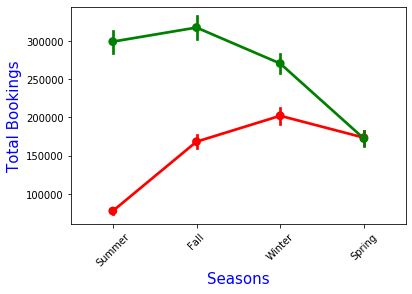

In [0]:
data=train_data[[(i.year==2011) for i in train_data["datetime"]]]
sns.pointplot(x="season",y="label",data=data,estimator=np.sum,label="2011",color="red")
plt.tick_params(axis="x",rotation=45)
data=train_data[[(i.year==2012) for i in train_data["datetime"]]]
sns.pointplot(x="season",y="label",data=data,estimator=np.sum,label="2012",color="green")
plt.ylabel("Total Bookings",color="blue",fontsize=15)
plt.xlabel("Seasons",color="blue",fontsize=15)

Text(0.5, 0, 'Seasons')

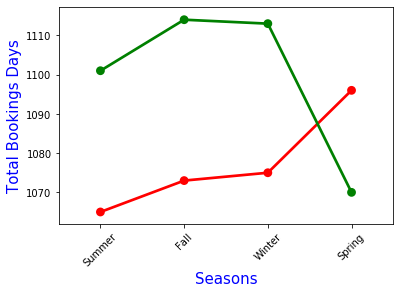

In [0]:
data=train_data[[(i.year==2011) for i in train_data["datetime"]]]
sns.pointplot(x="season",y="label",data=data,estimator=np.size,label="2011",color="red")
plt.tick_params(axis="x",rotation=45)
data=train_data[[(i.year==2012) for i in train_data["datetime"]]]
sns.pointplot(x="season",y="label",data=data,estimator=np.size,label="2012",color="green")
plt.ylabel("Total Bookings Days",color="blue",fontsize=15)
plt.xlabel("Seasons",color="blue",fontsize=15)

### Weather_wise Total Booking

Text(0.5, 0, 'Weather')

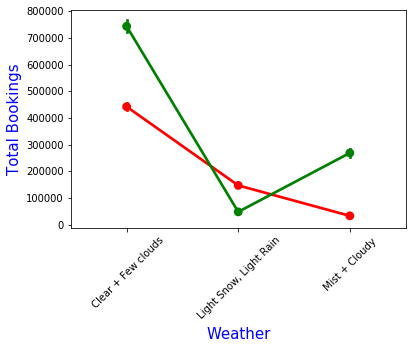

In [0]:
data=train_data[[(i.year==2011) for i in train_data["datetime"]]]
sns.pointplot(x="weather",y="label",data=data,estimator=np.sum,labels="year_2011",color="red")
plt.tick_params(axis="x",rotation=45)
data=train_data[[(i.year==2012) for i in train_data["datetime"]]]
sns.pointplot(x="weather",y="label",data=data,estimator=np.sum,labels="year_2012",color="green")
plt.ylabel("Total Bookings",color="blue",fontsize=15)
plt.xlabel("Weather",color="blue",fontsize=15)

Text(0.5, 0, 'Weather')

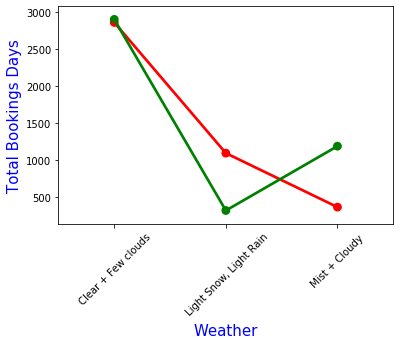

In [0]:
data=train_data[[(i.year==2011) for i in train_data["datetime"]]]
sns.pointplot(x="weather",y="label",data=data,estimator=np.size,label="2011",color="red")
plt.tick_params(axis="x",rotation=45)
data=train_data[[(i.year==2012) for i in train_data["datetime"]]]
sns.pointplot(x="weather",y="label",data=data,estimator=np.size,label="2012",color="green")
plt.ylabel("Total Bookings Days",color="blue",fontsize=15)
plt.xlabel("Weather",color="blue",fontsize=15)

### Holiday and Woking day

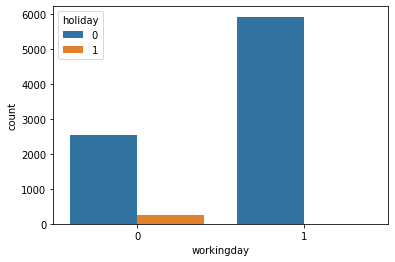

In [0]:
sns.countplot(data=train_data,hue="holiday",x="workingday")

#### As it can be seen that Working Day is Zero Even When there is not a Holiday

### Pie-Chart Showing Total Booking on Various Days

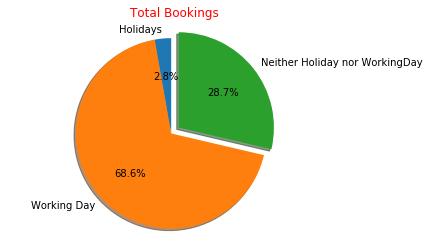

In [0]:
labels = 'Holidays', 'Working Day', 'Neither Holiday nor WorkingDay'
H=train_data[train_data["holiday"]==1]["label"].sum()
W=train_data[train_data["workingday"]==1]["label"].sum()
NB=train_data[(train_data["workingday"]==0)&(train_data["holiday"]==0)]["label"].sum()
sizes = [H, W, NB]
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Total Bookings",color="red")
plt.show()

#### Neither Holiday nor Working Day is Almost 29% Of Total Bookings that is  Likely to Be Cancelled Or Not Addressed 


### Regression Plot For continuous Variables To See Behaviour Of Various Explainatory variable On Bookings

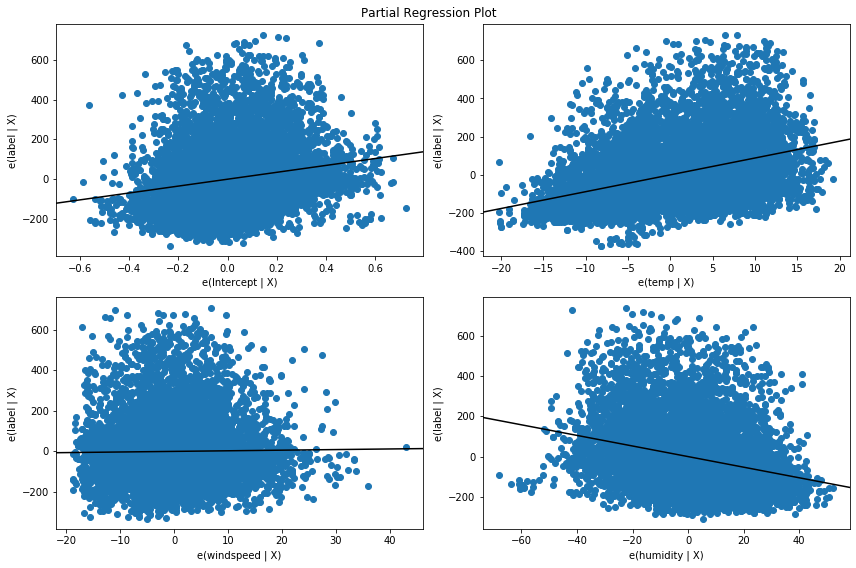

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model_ols = ols("label ~ temp + windspeed  + humidity", data=train_data).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_ols, fig=fig)

### Correlation Analysis

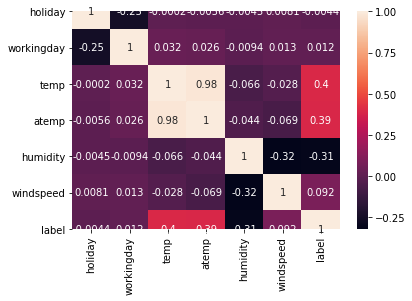

In [0]:
corr_mat=train_data.corr()
sns.heatmap(corr_mat,annot=True,)

#### Variables temp and atemp is Highly Correlated

## Feature Importances

### Label Encoding 

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data["season"]=encoder.fit_transform(train_data["season"])
train_data["weather"]=encoder.fit_transform(train_data["weather"])
test_data["season"]=encoder.fit_transform(test_data["season"])
test_data["weather"]=encoder.fit_transform(test_data["weather"])

### Get_Dummies

In [0]:
Train_data=pd.get_dummies(train_data)
Test_data=pd.get_dummies(test_data.drop("datetime",axis=1))
Train_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,label,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0
2,2011-01-13 09:00:00,0,1,5.74,6.060,50,22.0028,139,0,1,0,0,1,0,0
3,2011-11-18 16:00:00,0,1,13.94,16.665,29,8.9981,209,0,0,0,1,1,0,0
4,2011-09-13 13:00:00,0,1,30.34,33.335,51,19.0012,184,1,0,0,0,1,0,0


## Feature Importances

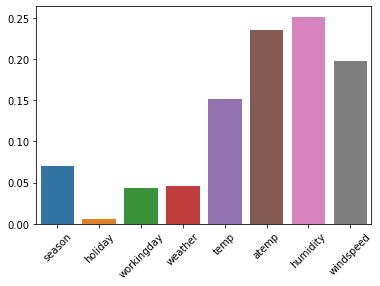

In [0]:
from sklearn.ensemble import RandomForestRegressor 
regressor =RandomForestRegressor() 
X=train_data.drop(["label","datetime"],axis=1)
Y=train_data["label"]
regressor.fit(X,Y)
sns.barplot(X.columns,regressor.feature_importances_)
plt.tick_params(axis="x",rotation=45)

## Feature Selection On Train And Test Data

For Label_Encoding

In [0]:
X=train_data.drop(["label","datetime","temp"],axis=1) 
x=test_data.drop(["datetime","temp"],axis=1)
Y=train_data["label"]
y=test_label

For Get_Dummies

In [0]:
X=Train_data.drop(["label","datetime","temp"],axis=1) 
x=Test_data.drop(["temp"],axis=1)
Y=Train_data["label"]
y=test_label

## GridSearch &  Regression Analysis

In [0]:
from sklearn.model_selection import GridSearchCV
n_estimators=np.arange(50,350,50)
l_rate=np.arange(0.1,1.1,0.1)
alpha=np.arange(0.1,0.9,0.1)

# 1. Ada-Boost Regressor  

## With Different Base Estimator

In [0]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()

### Different Base Estimator

In [0]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR

### Setting Param_Grid

In [0]:
param_grid={"n_estimators":n_estimators,"learning_rate":l_rate,"base_estimator":[RFR(),DTR(),SVR()]}
gcv=GridSearchCV(model,param_grid)
gcv.fit(X,Y) 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [RandomForestRegressor(bootstrap=True,
                                                                  criterion='mse',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrea...
                                                                  splitter='best'),
                                            SVR(C=1.0, cache_size=200,
                         

### Getting Best Suitable_parameters

In [0]:
gcv.best_params_

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 300}

### Creating Model with Best Param_

In [0]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(learning_rate=0.0001,n_estimators=150,base_estimator=RFR(n_estimators=50))
model.fit(X,Y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=50,
                                                       n_jobs=None,
                                                       oob_score=False,
                        

### MSE & R2_Score

In [0]:
predict=model.predict(x)
error=mean_squared_error(y,predict)
r2s=r2_score(y,predict)
print(error)
print(r2s)

21984.78488247992
0.31684077641259567


## 2.Gradient_Boost Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()

### Finding Best Parameters

In [0]:
param_grid={"n_estimators":n_estimators,"learning_rate":l_rate,"max_depth":[3,4,5,6],}
gcv=GridSearchCV(model,param_grid)
gcv.fit(X,Y) 
gcv.best_params_ 

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}

### Creating Model

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=120,learning_rate=0.1,max_depth= 5,alpha=0.99999)
model.fit(X,Y)

GradientBoostingRegressor(alpha=0.99999, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### MSE & R2_Score

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
predict=model.predict(x)
error=mean_squared_error(y,predict)
r2s=r2_score(y,predict)
print("Mse:",error)
print("R2_score:",round(r2s,3))

Mse: 20643.64457178878
R2_score: 0.359


## Performing Various Other Algorithm With Gradient Boost Regressor

## Feature Extraction

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=3)
x_train=lda.fit_transform(X,Y)
x_test=lda.transform(x)

In [0]:
param_grid={"n_estimators":n_estimators,"learning_rate":l_rate,"max_depth":[3,4,5,6],}
gcv=GridSearchCV(model,param_grid)
gcv.fit(x_train,Y) 
gcv.best_params_ 

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,max_depth= 5,alpha=0.99999)
model.fit(x_train,Y)

GradientBoostingRegressor(alpha=0.99999, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
predict=model.predict(x_test)
error=mean_squared_error(y,predict)
r2s=r2_score(y,predict)
print(error)
print(r2s)

21445.03877885565
0.33361294548576825


## Standard Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_test_scaled=scalar.fit_transform(x)

In [0]:
param_grid={"n_estimators":n_estimators,"learning_rate":l_rate,"max_depth":[3,4,5,6],}
gcv=GridSearchCV(model,param_grid)
gcv.fit(X_scaled,Y) 
gcv.best_params_ 

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,max_depth= 5,alpha=0.99999)
model.fit(X_scaled,Y)

GradientBoostingRegressor(alpha=0.99999, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
predict=model.predict(X_test_scaled)
error=mean_squared_error(y,predict)
r2s=r2_score(y,predict)
print(r2s)

0.34945396613205604


## The Best Result For the Data Is So Far is Given By Gradient Boost Regressor

###  With R2_Score =0.359 with No Feature Extraction Or Scaling